In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

C:\Users\maghw\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#pip install pydotplus

In [ ]:
#pip install imblearn


In [ ]:
#pip install lightgbm

In [ ]:
#pip install hyperopt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('C:\\Users\\maghw\\Downloads\\US_Heart_Patients.csv')
df=df.sample(frac=1, random_state=3)    # to remove sorting of values in columns

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [ ]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

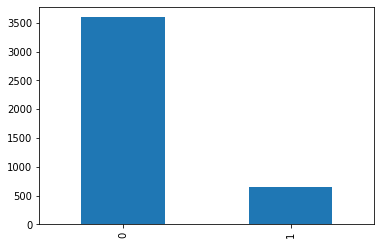

In [ ]:
df['TenYearCHD'].value_counts().plot.bar()
plt.show()

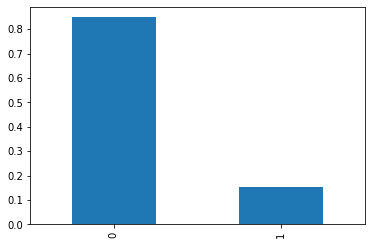

In [ ]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
ms=df.isnull().sum()
ms[ms>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [ ]:
#sns.distplot(df['glucose'])      

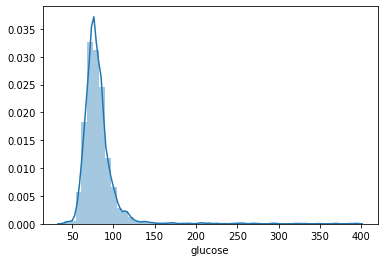

In [ ]:
sns.distplot(df['glucose'].dropna())

In [ ]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
#df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [ ]:
#sns.distplot(df['glucose'])

In [ ]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [ ]:
# forrward and backward fill will not change distribution , so we are using it

df=df.fillna(method='ffill')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [ ]:
#sns.pairplot(df, hue='TenYearCHD')

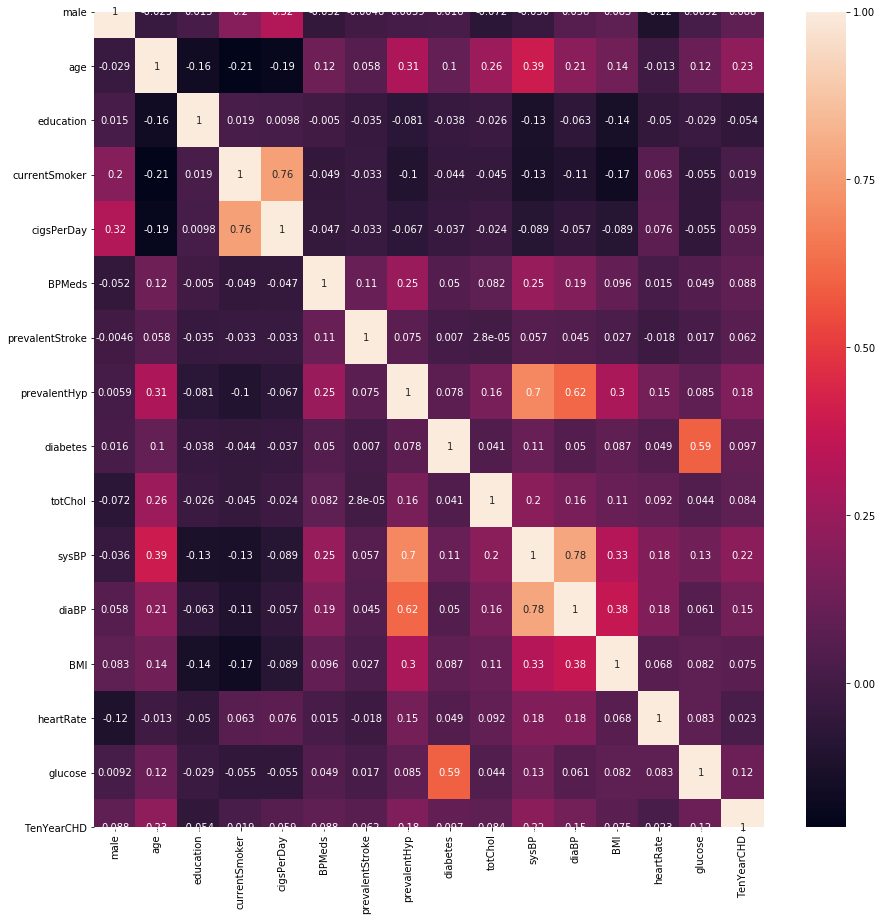

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot =True)

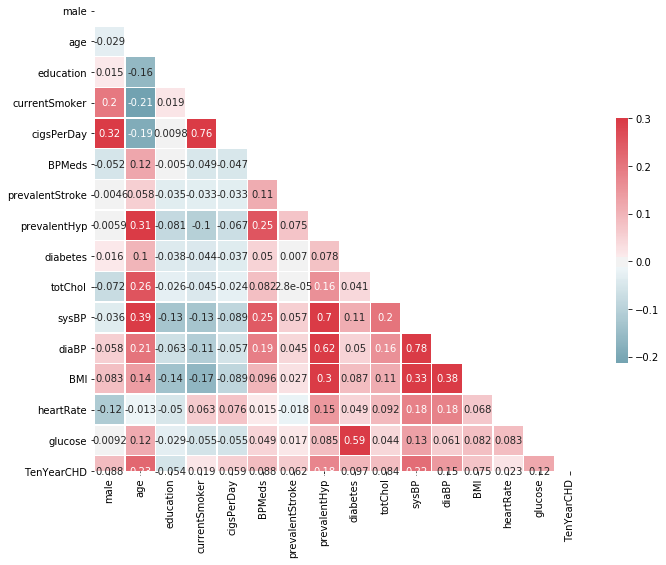

In [ ]:
import plusmodules as pm
pm.corr_matrix(df)

In [ ]:
cols= list(df.columns)
cols

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

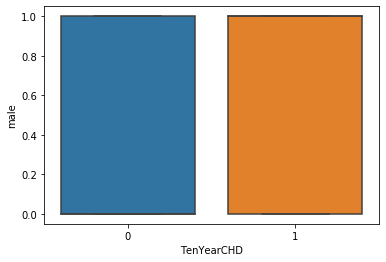

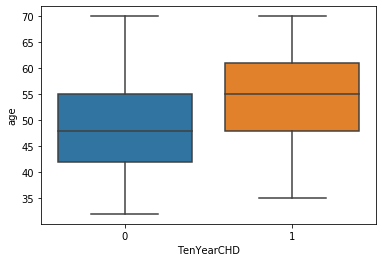

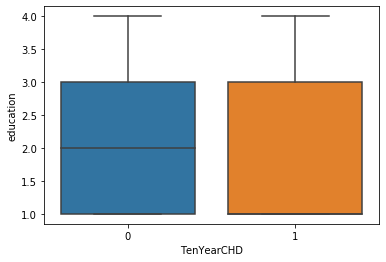

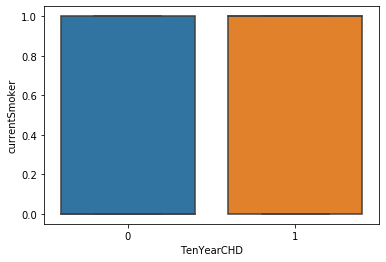

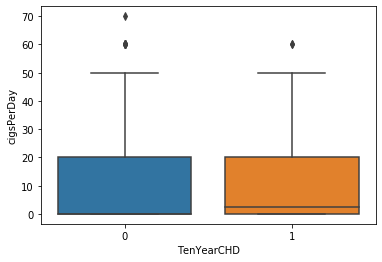

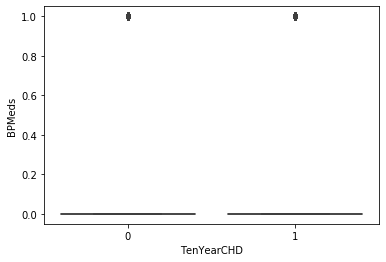

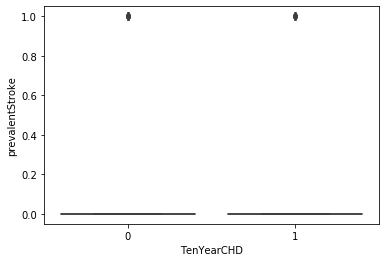

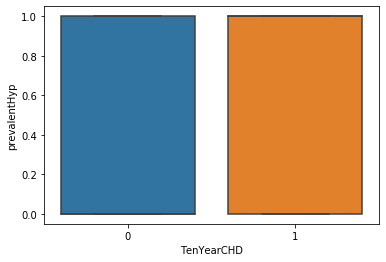

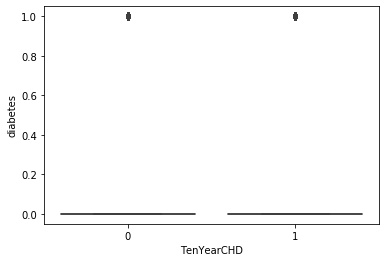

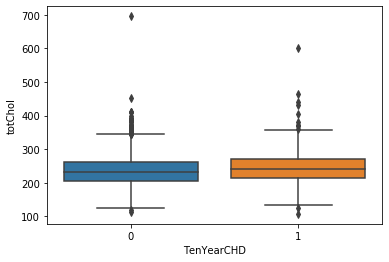

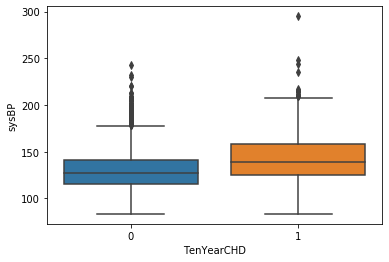

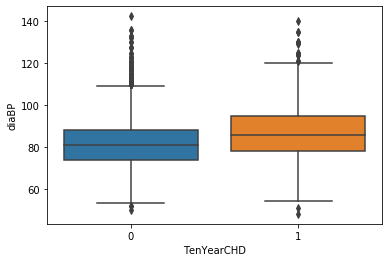

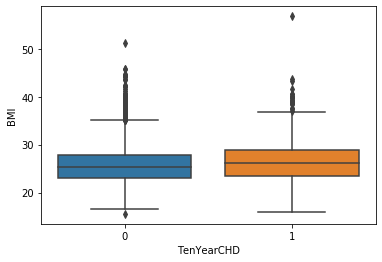

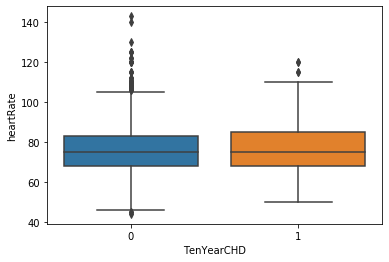

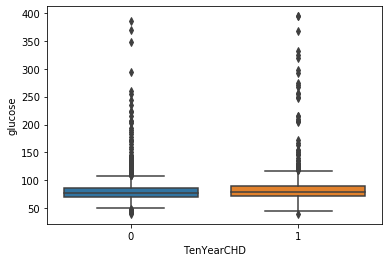

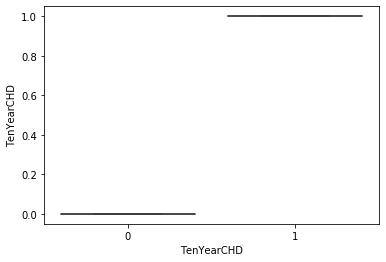

In [ ]:
for col in cols:
    sns.boxplot(y=df[col], x=df['TenYearCHD'])
    plt.show()

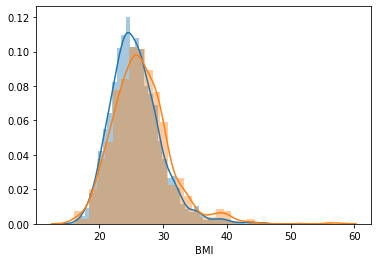

In [ ]:
df0=df[df['TenYearCHD']==0]
df1=df[df['TenYearCHD']==1]

sns.distplot(df0['BMI'])
sns.distplot(df1['BMI'])
plt.show()

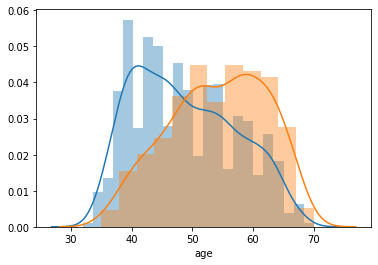

In [ ]:
df0=df[df['TenYearCHD']==0]
df1=df[df['TenYearCHD']==1]

sns.distplot(df0['age'])
sns.distplot(df1['age'])
plt.show()

##### if age more, more chances of getting chd

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0,0
968,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0,0
1667,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0,0
3321,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0,0


In [ ]:
import statsmodels.api as sm

y= df['TenYearCHD']
x= df.drop('TenYearCHD', axis=1)

xc= sm.add_constant(x)

C:\Users\maghw\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
xc

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3546,1.0,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0
1127,1.0,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0
3088,1.0,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0
437,1.0,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0
3188,1.0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1.0,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0
968,1.0,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0
1667,1.0,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0
3321,1.0,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0


In [ ]:
xc.values

array([[  1.  ,   0.  ,  54.  , ...,  27.64,  78.  ,  74.  ],
       [  1.  ,   0.  ,  42.  , ...,  24.38,  88.  ,  60.  ],
       [  1.  ,   0.  ,  58.  , ...,  28.4 ,  72.  ,  81.  ],
       ...,
       [  1.  ,   0.  ,  56.  , ...,  30.14,  80.  ,  86.  ],
       [  1.  ,   0.  ,  58.  , ...,  21.68,  91.  , 107.  ],
       [  1.  ,   0.  ,  40.  , ...,  23.16,  70.  ,  59.  ]])

In [ ]:
from statsmodels.stats.outliers_influence \ 
import variance_inflation_factor as vif

pd.DataFrame(  [vif(xc.values, i) for i in range(xc.shape[1])]   ,\
             index=xc.columns, columns=['vif']  )

,vif
const,197.703826
male,1.197415
age,1.368623
education,1.052772
currentSmoker,2.490359
cigsPerDay,2.618425
BPMeds,1.097285
prevalentStroke,1.018798
prevalentHyp,2.050602
diabetes,1.551588


### building logistic regression model

In [ ]:
model= sm.Logit(y,xc, random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1117
Time:                        10:24:37   Log-Likelihood:                -1604.3
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.189e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1133      0.664    -12.224      0.000      -9.414      -6.812
male                0.5068      0.101      5.043      0.000       0.310       0.704
age                 0.0619      0.006      9.960      0.000       0.050       0.074
education          -0.0168      0.046     -0.368      0.713      -0.106       0.072
currentSmoker       0.0136      0.144      0.094      0.925      -0.268       0.295
cigsPerDay          0.0212      0.006      3.736      0.000       0.010       0.032
BPMeds              0.2668      0.217      1.227      0.220      -0.160       0.693
prevalentStroke     0.9610      0.442      2.175      0.030       0.095       1.827
prevalentHyp        0.2298      0.128      1.789      0.074      -0.022       0.482
diabetes            0.2171      0.290      0.748      0.454      -0.352       0.786
totChol             0.0021      0.001      2.030      0.042    7.15e-05       0.004
sysBP               0.0141      0.004      3.984      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.492      0.623      -0.015       0.009
BMI                 0.0028      0.012      0.239      0.811      -0.020       0.026
heartRate          -0.0015      0.004     -0.397      0.691      -0.009       0.006
glucose             0.0064      0.002      3.077      0.002       0.002       0.011
===================================================================================
"""

###
pvalue for age=0.000:  
0.000 is the prob of setting |b_age|>=0.0624 when h0 is true

### backward elimination to remove insignificant features iteratively

In [ ]:
p=model.pvalues
p

const              2.309987e-34
male               4.583750e-07
age                2.275052e-23
education          7.125524e-01
currentSmoker      9.248067e-01
cigsPerDay         1.870401e-04
BPMeds             2.199894e-01
prevalentStroke    2.963039e-02
prevalentHyp       7.364671e-02
diabetes           4.543832e-01
totChol            4.233827e-02
sysBP              6.785667e-05
diaBP              6.229991e-01
BMI                8.107605e-01
heartRate          6.911357e-01
glucose            2.093535e-03
dtype: float64

In [ ]:

cols=list(xc.columns)
while len(cols)>1:
    x_1= xc[cols]
    model=sm.Logit(y,x_1, random_state=3).fit()
    p=model.pvalues
    max_p= max(p)
    feature_maxp= p.idxmax()
    
    if max_p>0.05:
        print('\n')
        print('column removed: ', feature_maxp, 'prob: ', max_p)
        cols.remove(feature_maxp)
    else:
        break
        
cols

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


column removed:  currentSmoker prob:  0.9248067145320604
Optimization terminated successfully.
         Current function value: 0.378370
         Iterations 7


column removed:  BMI prob:  0.8183474351558162
Optimization terminated successfully.
         Current function value: 0.378376
         Iterations 7


column removed:  heartRate prob:  0.6936547572101264
Optimization terminated successfully.
         Current function value: 0.378395
         Iterations 7


column removed:  education prob:  0.7021584464005117
Optimization terminated successfully.
         Current function value: 0.378412
         Iterations 7


column removed:  diaBP prob:  0.6177168524266301
Optimization terminated successfully.
         Current function value: 0.378441
         Iterations 7


column removed:  diabetes prob:  0.430019871794435
Optimization terminated successfully.
         Current function va

['const',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'totChol',
 'sysBP',
 'glucose']

In [ ]:
model=sm.Logit(y, xc[cols]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379099
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4232
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.1100
Time:                        10:24:38   Log-Likelihood:                -1607.4
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 8.410e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8484      0.438    -20.220      0.000      -9.706      -7.991
male                0.5096      0.098      5.184      0.000       0.317       0.702
age                 0.0635      0.006     10.632      0.000       0.052       0.075
cigsPerDay          0.0212      0.004      5.510      0.000       0.014       0.029
prevalentStroke     1.0675      0.437      2.443      0.015       0.211       1.924
totChol             0.0021      0.001      2.081      0.037       0.000       0.004
sysBP               0.0167      0.002      8.299      0.000       0.013       0.021
glucose             0.0074      0.002      4.579      0.000       0.004       0.011
===================================================================================
"""

In [ ]:
exp_b= pd.DataFrame({'coefficients': model.params,'exp_coefficients': np.exp(model.params)})
exp_b

,coefficients,exp_coefficients
const,-8.848368,0.000144
male,0.509623,1.664664
age,0.063459,1.065516
cigsPerDay,0.021153,1.021378
prevalentStroke,1.067451,2.907957
totChol,0.002113,1.002115
sysBP,0.016687,1.016827
glucose,0.007373,1.007400


### age

1. positive sign of age indicate that prob of CHd increases with age
2. log(odds) of CHD will increase by 0.0635 by unit change in age( 1 year change)   
   log(odds)= a+bx : x:age, b=0.0635
            
3. exp_coeff   = 1.065516

   exp_coeff-1 = 0.065516
   
   as age increses by 1 year, odds(CHd) increses by 6.55%

### male

since male is feature, female is base variable here, as this is dummy column

1. positive sign of male coeff indicate that male gender is more prone to CHD compared to female
2. log(odds) of CHD for male is higher by 0.509 compared to female
3. odds of CHD of male is 66.466% more than female

In [ ]:
xc

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3546,1.0,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0
1127,1.0,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0
3088,1.0,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0
437,1.0,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0
3188,1.0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1.0,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0
968,1.0,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0
1667,1.0,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0
3321,1.0,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0


In [ ]:
cols

['const',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'totChol',
 'sysBP',
 'glucose']

In [ ]:
y.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
x_prob= xc[cols]
x_prob['y']= y.values

C:\Users\maghw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_prob.head()

,const,male,age,cigsPerDay,prevalentStroke,totChol,sysBP,glucose,y
3546,1.0,0,54,0.0,0,241.0,106.0,74.0,0
1127,1.0,0,42,10.0,0,253.0,109.0,60.0,0
3088,1.0,0,58,0.0,1,274.0,159.0,81.0,0
437,1.0,1,45,30.0,0,240.0,141.0,76.0,0
3188,1.0,1,63,0.0,0,190.0,148.0,86.0,0


In [ ]:
x_prob.to_csv('x_prob.csv')

In [ ]:
prob= model.predict(xc[cols])
prob.head()

3546    0.069264
1127    0.040086
3088    0.432654
437     0.193365
3188    0.302438
dtype: float64

In [ ]:
type(prob)

pandas.core.series.Series

In [ ]:
prob

3546    0.069264
1127    0.040086
3088    0.432654
437     0.193365
3188    0.302438
          ...   
789     0.344482
968     0.120925
1667    0.171440
3321    0.193964
1688    0.038748
Length: 4240, dtype: float64

In [ ]:
prob= pd.DataFrame(prob, columns=['prob'])
prob.head()

,prob
3546,0.069264
1127,0.040086
3088,0.432654
437,0.193365
3188,0.302438


In [ ]:
prob['y_est']=prob['prob'].apply(lambda x: 1 if x>=0.5 else 0)
prob['y_est'].head()

3546    0
1127    0
3088    0
437     0
3188    0
Name: y_est, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [ ]:
prob.head()

,prob,y_est
3546,0.069264,0
1127,0.040086,0
3088,0.432654,0
437,0.193365,0
3188,0.302438,0


In [ ]:
prob['y']=y.values
prob['y']

3546    0
1127    0
3088    0
437     0
3188    0
       ..
789     0
968     0
1667    0
3321    0
1688    0
Name: y, Length: 4240, dtype: int64

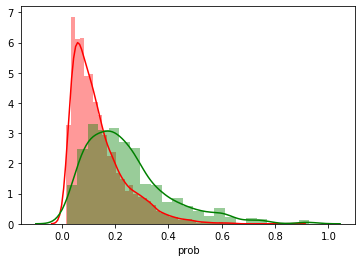

In [ ]:
df0=prob[prob['y']==0]
df1=prob[prob['y']==1]

sns.distplot(df0['prob'], color='r')
sns.distplot(df1['prob'], color='g')
plt.show()

## classification  report 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
confusion_matrix(y,prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [ ]:
accuracy_score(y, prob['y_est'])

0.8542452830188679

## roc analysis

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
roc_auc_score(y, prob['prob'])

0.7304199282847056

In [ ]:
print('auc value of model: ',roc_auc_score(y, prob['prob']))

auc value of model:  0.7304199282847056


In [ ]:
fpr, tpr, thesholds= roc_curve(y, prob['prob'])

In [ ]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78086763e-04,
       2.78086763e-04, 5.56173526e-04, 5.56173526e-04, 8.34260289e-04,
       8.34260289e-04, 1.39043382e-03, 1.39043382e-03, 2.22469410e-03,
       2.22469410e-03, 2.50278087e-03, 2.50278087e-03, 2.78086763e-03,
       2.78086763e-03, 3.33704116e-03, 3.33704116e-03, 3.61512792e-03,
       3.61512792e-03, 3.89321468e-03, 3.89321468e-03, 4.44938821e-03,
       4.44938821e-03, 4.72747497e-03, 4.72747497e-03, 5.00556174e-03,
       5.00556174e-03, 5.28364850e-03, 5.28364850e-03, 6.67408231e-03,
       6.67408231e-03, 7.23025584e-03, 7.23025584e-03, 8.89877642e-03,
       8.89877642e-03, 9.73303671e-03, 9.73303671e-03, 1.02892102e-02,
       1.02892102e-02, 1.16796440e-02, 1.16796440e-02, 1.25139043e-02,
       1.25139043e-02, 1.27919911e-02, 1.27919911e-02, 1.36262514e-02,
       1.36262514e-02, 1.44605117e-02, 1.44605117e-02, 1.47385984e-02,
       1.47385984e-02, 1.50166852e-02, 1.50166852e-02, 1.52947720e-02,
      

In [ ]:
thesholds

array([1.92865961, 0.92865961, 0.91312889, 0.85807079, 0.64451403,
       0.64416086, 0.64309831, 0.63692876, 0.62076474, 0.61888853,
       0.60102884, 0.59273286, 0.5770012 , 0.57610607, 0.56445639,
       0.56020808, 0.55728264, 0.55126303, 0.54849605, 0.54828537,
       0.54341342, 0.53974452, 0.5349244 , 0.53000139, 0.52883151,
       0.52733388, 0.52427393, 0.52388946, 0.51400158, 0.51330848,
       0.51019049, 0.49846189, 0.49116721, 0.48931525, 0.4872395 ,
       0.47831579, 0.47723031, 0.47321536, 0.46956079, 0.46852073,
       0.46553847, 0.4592962 , 0.458117  , 0.4555332 , 0.45126052,
       0.44956977, 0.44915032, 0.44740178, 0.44606112, 0.4384331 ,
       0.43737703, 0.43691176, 0.43508574, 0.43408986, 0.4330541 ,
       0.43265376, 0.43102807, 0.43008087, 0.43000903, 0.42957085,
       0.42936337, 0.42630178, 0.42528352, 0.42355043, 0.42345092,
       0.4234059 , 0.42331062, 0.42172468, 0.42110502, 0.42061139,
       0.42032199, 0.41772335, 0.41750821, 0.41465187, 0.41385

In [ ]:
thesholds[0]=thesholds[0]-1

In [ ]:
thesholds

array([0.92865961, 0.92865961, 0.91312889, 0.85807079, 0.64451403,
       0.64416086, 0.64309831, 0.63692876, 0.62076474, 0.61888853,
       0.60102884, 0.59273286, 0.5770012 , 0.57610607, 0.56445639,
       0.56020808, 0.55728264, 0.55126303, 0.54849605, 0.54828537,
       0.54341342, 0.53974452, 0.5349244 , 0.53000139, 0.52883151,
       0.52733388, 0.52427393, 0.52388946, 0.51400158, 0.51330848,
       0.51019049, 0.49846189, 0.49116721, 0.48931525, 0.4872395 ,
       0.47831579, 0.47723031, 0.47321536, 0.46956079, 0.46852073,
       0.46553847, 0.4592962 , 0.458117  , 0.4555332 , 0.45126052,
       0.44956977, 0.44915032, 0.44740178, 0.44606112, 0.4384331 ,
       0.43737703, 0.43691176, 0.43508574, 0.43408986, 0.4330541 ,
       0.43265376, 0.43102807, 0.43008087, 0.43000903, 0.42957085,
       0.42936337, 0.42630178, 0.42528352, 0.42355043, 0.42345092,
       0.4234059 , 0.42331062, 0.42172468, 0.42110502, 0.42061139,
       0.42032199, 0.41772335, 0.41750821, 0.41465187, 0.41385

In [ ]:
roc=pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thesholds': thesholds})
roc

,fpr,tpr,thesholds
0,0.000000,0.000000,0.928660
1,0.000000,0.001553,0.928660
2,0.000000,0.004658,0.913129
3,0.000278,0.004658,0.858071
4,0.000278,0.021739,0.644514
...,...,...,...
975,0.998888,0.996894,0.018324
976,0.998888,0.998447,0.018137
977,0.999166,0.998447,0.017470
978,0.999166,1.000000,0.017444


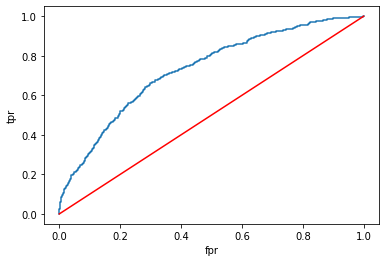

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, 'r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

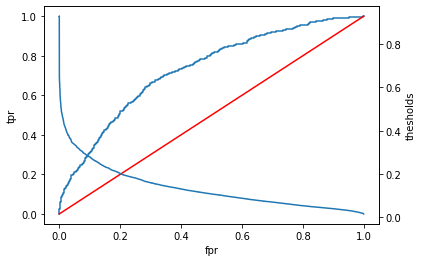

In [ ]:
fig,ax= plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr,fpr, 'r')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax1=ax.twinx()
ax1.set_ylabel('thesholds')
ax1.plot(fpr, thesholds)
plt.show()

In [ ]:
roc[(roc['tpr']>=0.80) & (roc['tpr']<=0.81)]

,fpr,tpr,thesholds
738,0.494160,0.801242,0.109596
739,0.496663,0.801242,0.109258
740,0.496663,0.802795,0.109103
741,0.497497,0.802795,0.109003
742,0.497497,0.804348,0.108997
743,0.498331,0.804348,0.108638
744,0.498331,0.805901,0.108583
745,0.498610,0.805901,0.108400
746,0.498610,0.809006,0.108310
747,0.499166,0.809006,0.108284
